In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
columns = ["sex", "length", "diameter", "height", "whole_wt", 
           "shucked_wt", "viscera_wt", "shell_wt", "rings"]

In [5]:
df.columns = columns

In [6]:
df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [7]:
df.to_csv('abalone_cleaned.csv')

# Visulization

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
sex           4176 non-null object
length        4176 non-null float64
diameter      4176 non-null float64
height        4176 non-null float64
whole_wt      4176 non-null float64
shucked_wt    4176 non-null float64
viscera_wt    4176 non-null float64
shell_wt      4176 non-null float64
rings         4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76440a2b70>,
      dtype=object)

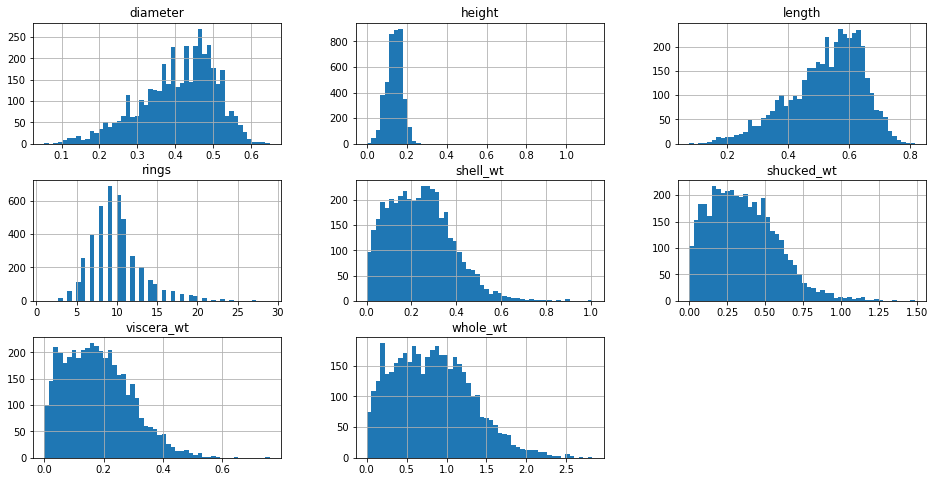

In [9]:
df.hist(bins=50, figsize=(16, 8))

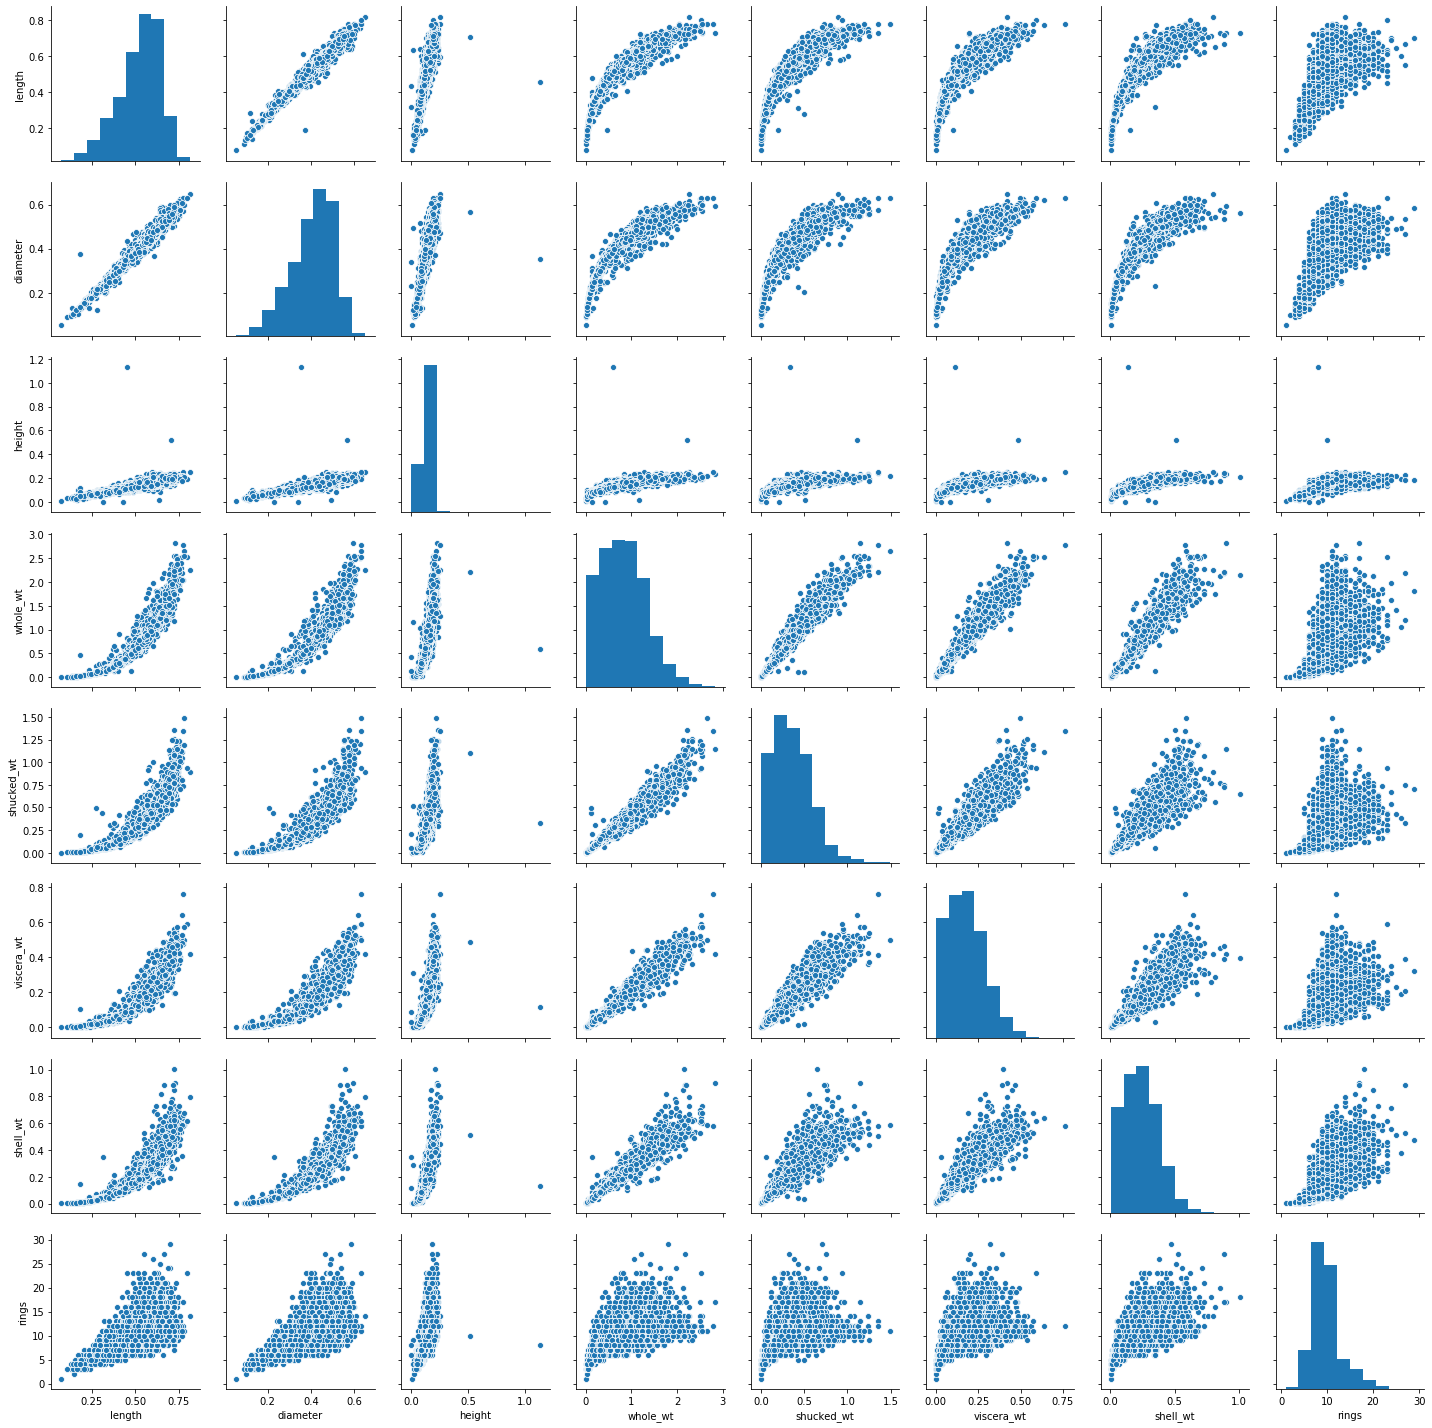

In [10]:
sns.pairplot(df)

In [12]:
corr_matrix = df.corr()
corr_matrix['rings'].sort_values()

shucked_wt    0.421256
viscera_wt    0.504274
whole_wt      0.540818
length        0.557123
height        0.558109
diameter      0.575005
shell_wt      0.628031
rings         1.000000
Name: rings, dtype: float64

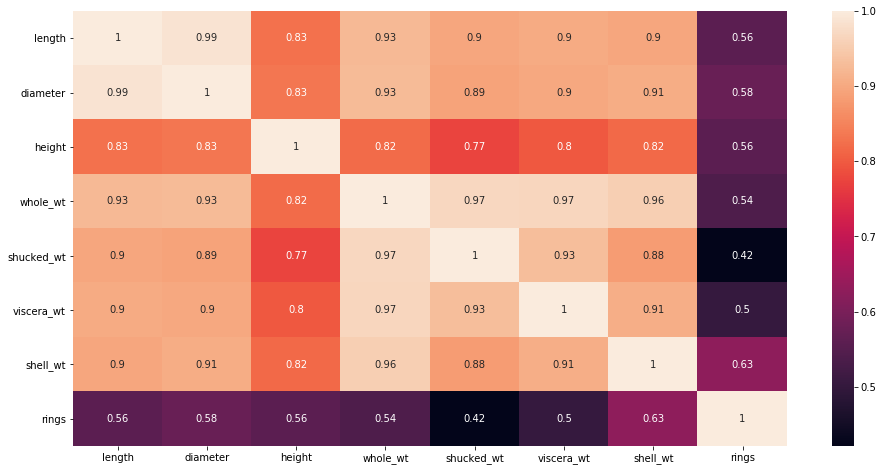

In [14]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True)

## Preparing the data for ML algo

In [15]:
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [16]:
np.unique(df.rings)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

In [18]:
X = df.drop('rings', axis=1)
y = df.rings

In [19]:
X

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [20]:
df_cat = df[['sex']]

In [21]:
df_num = df.drop('sex', axis=1)

In [22]:
df_num

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [23]:
df_cat

,sex
0,M
1,F
2,M
3,I
4,I
...,...
4171,F
4172,M
4173,M
4174,F


In [24]:
np.unique(df_cat)

array(['F', 'I', 'M'], dtype=object)

In [25]:
df_cat_coded = pd.get_dummies(df_cat, prefix=['sex'])

In [26]:
df_cat_coded

,sex_F,sex_I,sex_M
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4171,1,0,0
4172,0,0,1
4173,0,0,1
4174,1,0,0


In [27]:
df_num.drop('rings', axis=1, inplace=True)

In [28]:
df_num

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


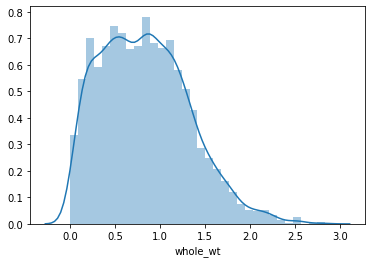

In [30]:
sns.distplot(df_num.whole_wt)

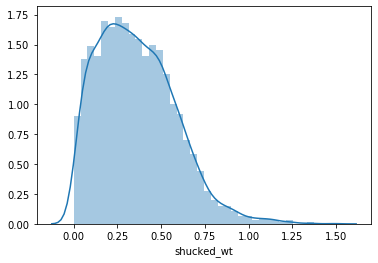

In [31]:
sns.distplot(df['shucked_wt'])

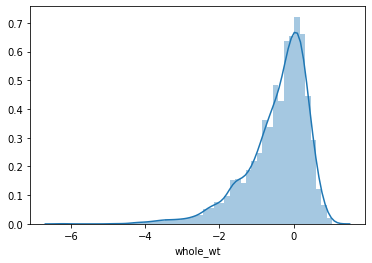

In [33]:
sns.distplot(np.log(df['whole_wt']))

In [34]:
df_num

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [35]:
df_cat_coded

,sex_F,sex_I,sex_M
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4171,1,0,0
4172,0,0,1
4173,0,0,1
4174,1,0,0


In [36]:
df_final = pd.concat([df_num, df_cat_coded], axis=1, join='outer')

In [37]:
df_final

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,sex_F,sex_I,sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [38]:
y

0        7
1        9
2       10
3        7
4        8
        ..
4171    11
4172    10
4173     9
4174    10
4175    12
Name: rings, Length: 4176, dtype: int64

In [39]:
X = df_final.values

In [40]:
y = y.values

In [41]:
X

array([[0.35 , 0.265, 0.09 , ..., 0.   , 0.   , 1.   ],
       [0.53 , 0.42 , 0.135, ..., 1.   , 0.   , 0.   ],
       [0.44 , 0.365, 0.125, ..., 0.   , 0.   , 1.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.   , 0.   , 1.   ],
       [0.625, 0.485, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.   , 0.   , 1.   ]])

In [42]:
y

array([ 7,  9, 10, ...,  9, 10, 12])

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)

In [47]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
clf.score(X_test, y_test)

0.2583732057416268

In [49]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=10, n_jobs=-1)

In [50]:
df_final

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,sex_F,sex_I,sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [51]:
y

array([ 7,  9, 10, ...,  9, 10, 12])

In [52]:
y = y.astype('float')

In [53]:
y

array([ 7.,  9., 10., ...,  9., 10., 12.])

In [54]:
X

array([[0.35 , 0.265, 0.09 , ..., 0.   , 0.   , 1.   ],
       [0.53 , 0.42 , 0.135, ..., 1.   , 0.   , 0.   ],
       [0.44 , 0.365, 0.125, ..., 0.   , 0.   , 1.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.   , 0.   , 1.   ],
       [0.625, 0.485, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.   , 0.   , 1.   ]])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
rnd_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
rnd_reg.score(X_test, y_test)

0.5288858721775832